<a href="https://colab.research.google.com/github/Cchamorrom/Entregas/blob/main/Parcial_1_se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto b)

In [19]:
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

Esta funcion genera el cero y pendiente definidos por ymin y ymax de la siguiente forma:
$$ y[t_k] \in [y_{min},y_{max}]$$

$$y[t_k] = m x[t_k] + c$$

$$m = \frac{y_{max}-y_{min}}{x_{max}-x_{min}}$$

$$c = y[t_k] - m x[t_k]$$

In [20]:
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

Esta funcion crea una funcion de cuantizacion para luego evaluarla punto a punto con cada muestra

Se trabajará con la señal:
$x(t) = 3Cos(1000Πt)+5Sin(2000Πt)+10Cos(11000Πt)$

In [21]:

import numpy as np #importa la biblioteca numpy para trabajar en discreto
import matplotlib.pyplot as plt # importa matplolib para generar las graficas
from scipy.spatial.distance import cdist #importa cdist que se utiliza para calcular la distancia entre todos los pares de puntos de dos conjuntos de datos
# Señal 1
w1=1000*np.pi  #frecuencia angular de la señal 1
F1=w1/(2*np.pi) #frecuencia en Hertz de la señal 1
T1=1/F1         #Periodo de la señal 1
A1=3            #Amplitud de la señal 1
#Señal 2
w2=2000*np.pi     #frecuencia angular de la señal 1
F2=w2/(2*np.pi)   #frecuencia en Hertz de la señal 1
A2=5              #Amplitud de la señal 1
#Señal 3
w3=11000*np.pi    #frecuencia angular de la señal 1
F3=w3/(2*np.pi)   #frecuencia en Hertz de la señal 1
A3=10             #Amplitud de la señal 1
A4=A1+A3          #Después de los calculos realizados en el PDF adjunto a la entrega se determinó que las amplitudes de las señales 1 y 3 se sumaban
Fs=5000           #Frecuencia de muestreo dada por el conversor análogo digital
Ts=1/Fs           #Periodo de muestreo
tv=np.arange(0,2*T1,Ts) #Crea un arreglo en numpy que contiene valores de tiempo desde 0 hasta 2 veces T1
#Se tomó T1 porque la señal 1 es la que tiene frecuencia mas pequeña y con esto se asegura poder obtener almenos un ciclo completo de la señal 1
#Ts representa la distancia entre cada valor de tiempo que toma tv
x=A4*np.cos(w1*tv)+A2*np.sin(w2*tv) #Señal que se va a trabajar

ycs=my_ceropen(x,ymin=-5,ymax=5)#ycs contiene la señal x despues de ajustar sus valores para que estén dentro del rango -5 a 5,
#se toma este rango ya que la amplitud más alta de las señales originales era 10

nbits = 3 #numero de bits utilizado en el proceso de cuantización
rmin = -5
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) #genera un arreglo de 8 puntos equiespaciados entre -5 y 5
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #calcula la distancia entre los puntos de la señal ycs y los puntos del areglo ve
d.shape #muestra las dimensiones de d (filas,columnas)

(20, 8)

In [22]:
ind = np.argmin(d,axis=1)#devuelve un arreglo de índices donde cada elemento indica el índice del valor mínimo en la fila correspondiente de d
ind

array([6, 7, 5, 2, 0, 1, 2, 3, 4, 5, 6, 7, 5, 2, 0, 1, 2, 3, 4, 5])

In [23]:
for i in range(ycs.shape[0]): #itera desde 0 hasta el numero de filas de ycs
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve) #si es la primera muestra se llama la funcion my_cuantizador con la primera fila de ycs como argumento
     #y ve como el vector de estados para cuantizar la muestra. El resultado de la cuantización se asigna a la variable yq.
   else: #si i no es la primera muestra
     yq = np.append(yq,my_cuantizador(ycs[i],ve))#se llama a la función my_cuantizador con la fila actual de ycs como argumento y ve como el vector de estados para cuantizar la muestra.
     #El resultado de la cuantización se agrega al arreglo yq utilizando np.append Esto se hace para acumular los resultados de la cuantización de todas las muestras en ycs.


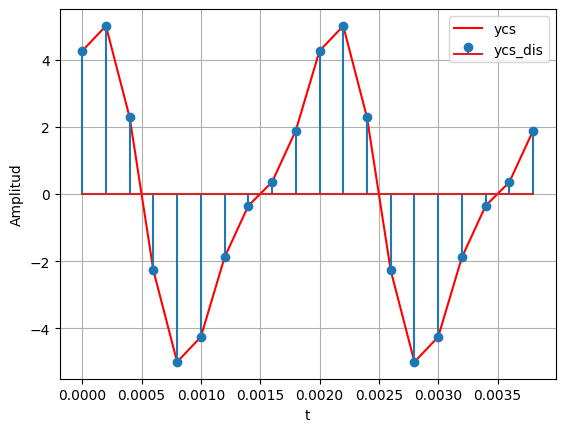

In [24]:
plt.plot(tv,ycs,c='r', label='ycs')#cs continua
plt.stem(tv,ycs, label='ycs_dis')#cs discreta
plt.legend()#agrega la leyenda al grafico
plt.grid()#agrega la cuadricula
plt.xlabel('t')#nombra el eje x
plt.ylabel('Amplitud')#nombra el eje y
plt.show()#muestra la grafica

#Ahora usando Fs adecuado segun Nyquist
el siguiente codigo repite todo el proceso anterior pero cambiando la frecuencia de muestreo a una adecuada que cumpla la desigualdad de Nyquist

In [25]:
# Señal 1
w1=1000*np.pi  #frecuencia angular de la señal 1
F1=w1/(2*np.pi) #frecuencia en Hertz de la señal 1
T1=1/F1         #Periodo de la señal 1
A1=3            #Amplitud de la señal 1
#Señal 2
w2=2000*np.pi     #frecuencia angular de la señal 2
F2=w2/(2*np.pi)   #frecuencia en Hertz de la señal 2
A2=5              #Amplitud de la señal 2
#Señal 3
w3=11000*np.pi    #frecuencia angular de la señal 3
F3=w3/(2*np.pi)   #frecuencia en Hertz de la señal 3
A3=10             #Amplitud de la señal 3
A4=A1+A3          #Después de los calculos realizados en el PDF adjunto a la entrega se determinó que las amplitudes de las señales 1 y 3 se sumaban
Fs=30000           #Frecuencia de muestreo adaptada para que cumpla Nyquist
Ts=1/Fs           #Periodo de muestreo
tv=np.arange(0,2*T1,Ts) #Crea un arreglo en numpy que contiene valores de tiempo desde 0 hasta 2 veces T1
#Se tomó T1 porque la señal 1 es la que tiene frecuencia mas pequeña y con esto se asegura poder obtener almenos un ciclo completo de la señal 1
#Ts representa la distancia entre cada valor de tiempo que toma tv
x=A4*np.cos(w1*tv)+A2*np.sin(w2*tv) #Señal que se va a trabajar

ycs=my_ceropen(x,ymin=-5,ymax=5)#ycs contiene la señal x despues de ajustar sus valores para que estén dentro del rango -5 a 5,
#se toma este rango ya que la amplitud más alta de las señales originales era 10

nbits = 3 #numero de bits utilizado en el proceso de cuantización
rmin = -5
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) #genera un arreglo de 8 puntos equiespaciados entre -5 y 5
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #calcula la distancia entre los puntos de la señal ycs y los puntos del areglo ve
d.shape #muestra las dimensiones de d (filas,columnas)

(120, 8)

In [26]:
ind = np.argmin(d,axis=1)#devuelve un arreglo de índices donde cada elemento indica el índice del valor mínimo en la fila correspondiente de d
ind

array([6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 4, 4, 3, 2, 2, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7,
       7, 7, 7, 6, 6, 6, 5, 5, 4, 4, 3, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 6, 6, 6])

In [27]:
for i in range(ycs.shape[0]): #itera desde 0 hasta el numero de filas de ycs
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve) #si es la primera muestra se llama la funcion my_cuantizador con la primera fila de ycs como argumento
     #y ve como el vector de estados para cuantizar la muestra. El resultado de la cuantización se asigna a la variable yq.
   else: #si i no es la primera muestra
     yq = np.append(yq,my_cuantizador(ycs[i],ve))#se llama a la función my_cuantizador con la fila actual de ycs como argumento y ve como el vector de estados para cuantizar la muestra.
     #El resultado de la cuantización se agrega al arreglo yq utilizando np.append Esto se hace para acumular los resultados de la cuantización de todas las muestras en ycs.

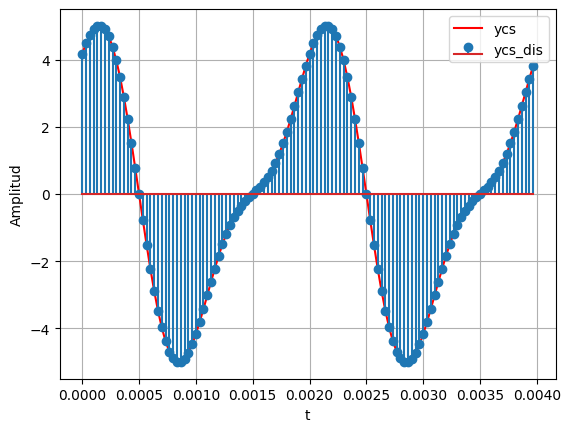

In [28]:
plt.plot(tv,ycs,c='r', label='ycs')#cs continua
plt.stem(tv,ycs, label='ycs_dis')#cs discreta
plt.legend()#agrega la leyenda al grafico
plt.grid()#agrega la cuadricula
plt.xlabel('t')#nombra el eje x
plt.ylabel('Amplitud')#nombra el eje y
plt.show()#muestra la grafica

# Punto C)

Utilizamos la misma funcion del punto anterior para calcular cero y pendiente

In [29]:
#función cero y pendiente
def my_ceropend(x,xhmax=20,xhmin=4):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh

Trabajaremos la señal $x(t)=20(cos(t/3)+cos(t/4))$

<ipython-input-30-efb55b8b9683>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


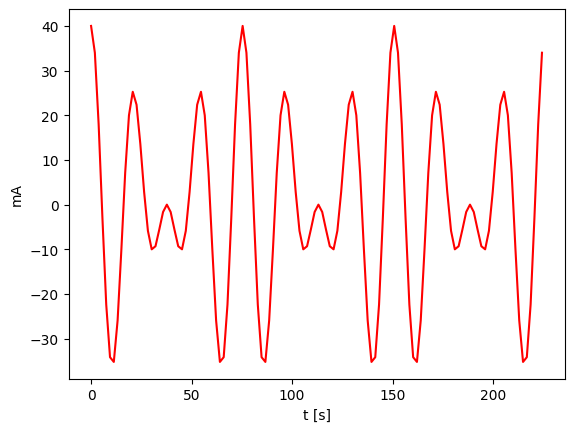

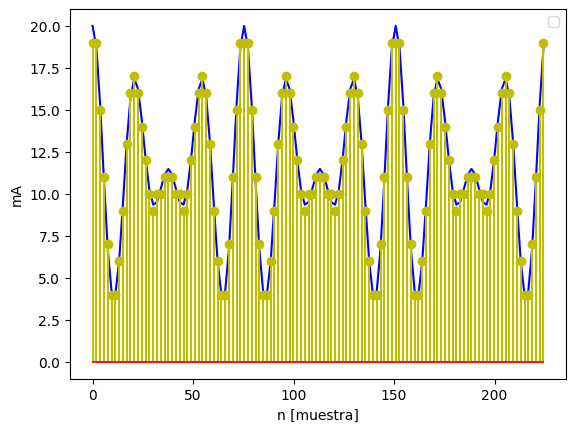

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

T1 = 6*np.pi #perido señal 1
T2 = 8*np.pi #perido señal 2
F1 = 1/T1 #frecuencia señal 1
F2 = 1/T2 #frecuencia señal 2
T = 24*np.pi #perido cuasiperiódica
Fs = 10*max(F1,F2) #frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = 20*(np.cos(t/3)+np.cos(t/4)) # Señal a trabajar
xhmax = 20 #especifica el limite superior
xhmin = 4 #especifica el limite inferior
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 4 a 20 y .reshape(-1,1) para asegurar vector columna


#cuantizar
nbits = 4 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

#gráficas de señales
plt.plot(t,x,'r',label='')
plt.xlabel('t [s]')
plt.ylabel('mA')
plt.show()
plt.plot(t,xh,'b',label='')
plt.stem(t,xq,'y',label='')
plt.xlabel('n [muestra]')
plt.ylabel('mA')
#plt.ylim(4, 20) #Descomentar para ver la grafica iniciando desde 4 hasta 20
plt.legend()
plt.show()

In [31]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit (deriva el escalon para obtener el impulso)
print(h)

[ 2 -3  4 -5 10]


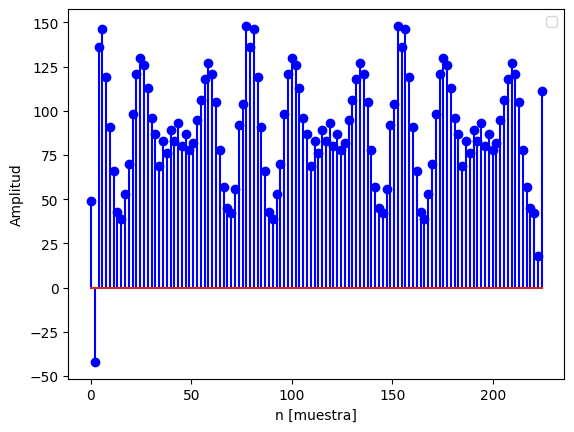

In [32]:
y = np.convolve(xq,h,mode='same')#respuesta del slit -> se asegura tamaños iguales con mode=same
#graficar señal
plt.stem(t,y,'b',label='')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()